In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from RobotSim373 import *

Version:  0.0.41


In [37]:
def build(robot):
    R=.5
    r=R/5
    
    x=15
    y=17
    angle=0
    disk_center=Disk(robot,x,y,radius=R,angle=angle,name='center')

    disks=[]
    for angle in range(0,360,30):
        disk=Disk(robot,
                          x+(R+1.1*r)*cos(radians(angle)),
                          y+(R+1.1*r)*sin(radians(angle)),
                 angle=angle,radius=r,
                 name='disk %d' % angle)
        disks.append(disk)

    connect(disk_center,disks,'weld')

    left=Box(robot,x=x-2,y=y,width=.1,height=3,name="left")
    right=Box(robot,x=x+2,y=y,width=.1,height=3,name="right")
    connect(disk_center,left,'weld')    
    connect(disk_center,right,'weld')    
    
    robot.disks=disks
    robot.angles=list(range(0,360,30))
    robot.distances=[-1]*len(disks)

In [38]:
def forward(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 0'].F=10
    return True


In [39]:
def up(t,robot):
    for disk in robot.disks:
        disk.F=0
        
    robot['disk 90'].F=10
    return True

In [40]:
def monitor(t,robot):
    robot.message=t

In [41]:
state_machine=StateMachine(
    (forward,'forward'),
)




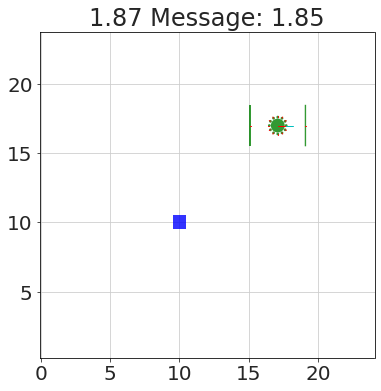

In [44]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

Box(env,x=10,y=10)

run_sim(env,robot.controller,
        figure_width=6,
       total_time=30,
       dt_display=0.3,  # make this larger for a faster display
       )


Let's say I want to start robot in lower left, take this piece that is at 10,10 and move it to 15,10 and then return to the lower left.

- move to the right until aligned with the object (known location, or distance sensor) = move to the right until x=10
- move up until y=8
- move again to the right until x=15
- move down to the ground
- move back to the left wall

